In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.fft import fft, ifft, fftfreq

class IzhikevichNeuron:
    def __init__(self,a=0.02, b=0.2, c=-65, d=8):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def dvdt(self, v, u, I=10):
        t1 = 0.04*(v**2)
        t2 = 5*v
        t3 = 140 - u
        t4 = I
        return t1 + t2 + t3 + t4
    
    def dudt(self, v, u):
        return self.a * (self.b * v - u)
    
    def spike_reset(self,v,u):
        if v >= 30:
            v = self.c
            u = u + self.d
        
        return v, u
    
    def rk4step(self,u0,v0,I=10,h=0.001):
        v, u = self.spike_reset(u0,v0)
        
        k1v = h * self.dvdt(v, u, I)
        k1u = h * self.dudt(v, u)
        
        k2v = h * self.dvdt(v + 0.5 * k1v, u + 0.5 * k1u, I)
        k2u = h * self.dudt(v + 0.5 * k1v, u + 0.5 * k1u)
        
        k3v = h * self.dvdt(v + 0.5 * k2v, u + 0.5 * k2u, I)
        k3u = h * self.dudt(v + 0.5 * k2v, u + 0.5 * k2u)
        
        k4v = h * self.dvdt(v + k3v, u + k3u, I)
        k4u = h * self.dudt(v + k3v, u + k3u)
        
        v = v + (1.0/6.0) * (k1v + 2 * k2v + 2 * k3v + k4v)
        u = u + (1.0/6.0) * (k1u + 2 * k2u + 2 * k3u + k4u)
        
        return v, u
    
    def simulatebaseline(self, v0=10, u0=10, time=10, h=0.01, current=10, unstim_time=0):
        un = round(unstim_time/h)
        n = round(time/h)
        v_history = []
        u_history = []
        v,u  = v0,u0
        for i in range(n):
            if i < un:
                I = 0
            else:
                I = current
            
            v, u = self.rk4step(v,u,I,h)
            v_history.append(v)
            u_history.append(u)
        
        return v_history,u_history
    
    def get_spike_count(self,window_size=10,repeats=100,h=0.01,current=10):
        n = round(window_size*repeats/h)
        v = u = 0
        I = current
        counts = [0] * repeats
        for i in range(n):
            v,u = self.rk4step(v,u,I,h)
            if v >= 30:
                counts[int(i//(window_size/h))] += 1
        return counts[1:]

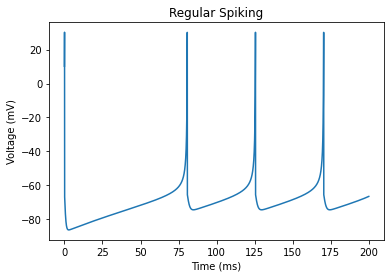

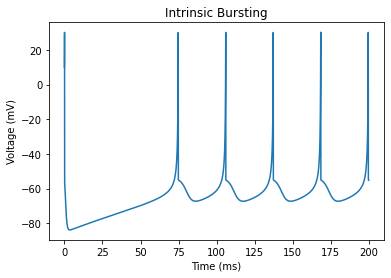

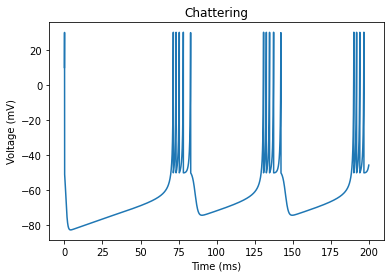

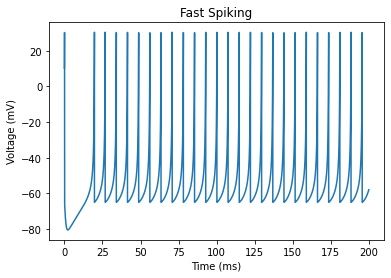

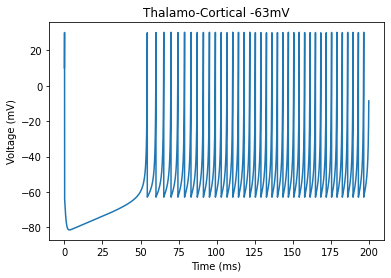

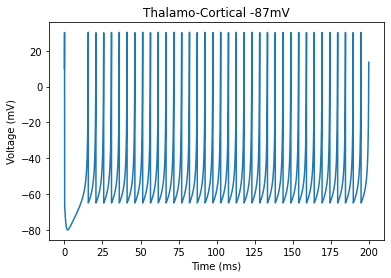

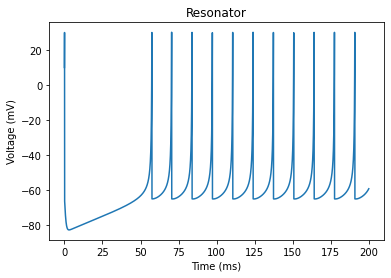

In [93]:
#Regular Spiking
rs_dic =  {"a":0.02,"b":0.2,"c":-65,"d":8}
lts_dic = {"a":0.02,"b":0.25,"c":-65,"d":2}
ib_dic =  {"a":0.02,"b":0.2,"c":-55,"d":4}
ch_dic =  {"a":0.02,"b":0.2,"c":-50,"d":2}
tc1_dic = {"a":0.02,"b":0.25,"c":-63,"d":0.06}
tc2_dic = {"a":0.02,"b":0.25,"c":-87,"d":0.06}
rz_dic =  {"a":0.1,"b":0.26,"c":-65,"d":2}
fs_dic =  {"a":0.1,"b":0.2,"c":-65,"d":2}

l = [rs_dic, ib_dic, ch_dic, fs_dic, tc1_dic, rz_dic, lts_dic]
titles = ["Regular Spiking","Intrinsic Bursting","Chattering","Fast Spiking",
          "Thalamo-Cortical -63mV","Thalamo-Cortical -87mV","Resonator",
          "Low-Threshold Spiking"]

for t,d in zip(titles, l):
    h = 0.001
    time = 200
    model = IzhikevichNeuron(**d)
    vs, us = model.simulatebaseline(current=10, h=h, time=time)

    plt.figure(figsize=(6, 4))
    plt.plot(np.arange(0, time, h), vs)
    plt.title(t)
    plt.ylabel("Voltage (mV)")
    plt.xlabel("Time (ms)")
    plt.show()

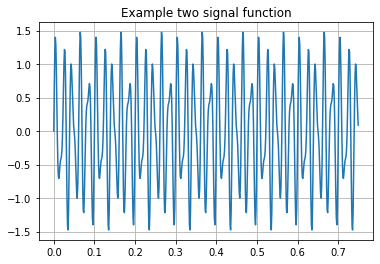

In [60]:
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x, y)
plt.grid()
plt.title("Example two signal function")
plt.show()

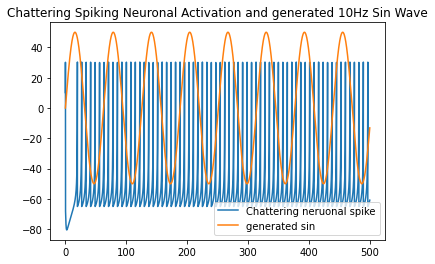

In [83]:
#Regular Spiking
# h = 0.001
# time = 500
# a = 0.02
# b = 0.2
# c = -65
# d = 8

h = 0.001
time = 500
a = 0.1
b = 0.2
c = -65
d = 2

# h = 0.001
# time = 500
# a = 0.02
# b = 0.2
# c = -50
# d = 2

model = IzhikevichNeuron(a=a, b=b, c=c, d=d)
vs, us = model.simulatebaseline(current=10, h=h, time=time)
s = np.sin(np.arange(0, len(vs), 1) / 10000) * 50
plt.plot(np.arange(0, time, h), vs)
plt.plot(np.arange(0, time, h), s)
plt.title("Chattering Spiking Neuronal Activation and generated 10Hz Sin Wave")
plt.legend(['Chattering neruonal spike', 'generated sin'], loc='lower right')
plt.show()

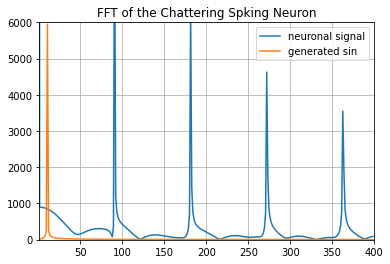

In [86]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
xf = np.linspace(0.0, len(vs), N)
syf = fft(s) / 7
vyf = fft(vs)
xf = fftfreq(N, T)[:N//2]
vxf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(vyf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(syf[0:N//2]))
plt.xlim(1, 400)
plt.ylim(-5, 6000)
plt.title("FFT of the Chattering Spking Neuron")
plt.legend(['neuronal signal', 'generated sin'])
plt.grid()
plt.show()

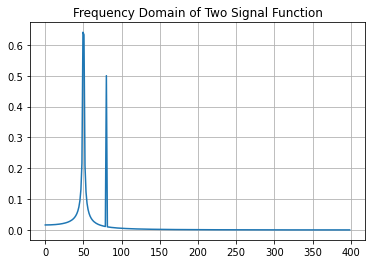

In [89]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.title("Frequency Domain of Two Signal Function")
plt.show()